In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../../notes and data/Real estate.csv')

In [3]:
print(df.isnull().sum()[df.isnull().sum() > 0].to_string())

Series([], )


In [4]:
# from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
# linear_model = LinearRegression()


In [5]:
x = df.drop(columns =['Y house price of unit area'])
y = df['Y house price of unit area']
y = np.log(y)
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
# x = np.array(x)
# y = np.array(y)

In [6]:
# poly = PolynomialFeatures(2)
polynomial_converter=PolynomialFeatures(degree=4, include_bias=False)
x_poly=polynomial_converter.fit_transform(x_scaled)
print(x_poly)
x_train,x_test,y_train,y_test = train_test_split(x_poly,y,test_size=0.2, random_state=42)
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

[[-0.82368321  1.25562833 -0.79249504 ...  0.25507592  0.10171086
   0.04055694]
 [-0.82368321  0.15708622 -0.61661163 ...  0.13396837  0.05889668
   0.02589282]
 [ 1.54115111 -0.38779067 -0.41401527 ...  1.04700461  0.48459917
   0.22429353]
 ...
 [ 0.35873395  0.09556786 -0.54967846 ...  0.12171989  0.06271265
   0.03231088]
 [-0.52896662 -0.84478419 -0.77668389 ...  0.0077605  -0.02002827
   0.05168887]
 [ 1.24643452 -0.98539758 -0.78807071 ...  0.07379837  0.10965724
   0.16294005]]
(331, 209) (83, 209)
(331,) (83,)


In [7]:
lasso_alphas = [0.01, 0.1, 0.1, 1, 10]
# linear_model = RidgeCV(alphas = alphas, cv = 5)
# linear_model.fit(x_train,y_train)


linear_model = LassoCV(alphas=lasso_alphas, cv=5, max_iter=10000)
linear_model.fit(x_train, y_train)

LassoCV(alphas=[0.01, 0.1, 0.1, 1, 10], cv=5, max_iter=10000)

In [8]:
train_score = linear_model.score(x_train,y_train)
test_score = linear_model.score(x_test,y_test)
print(train_score,test_score)

0.7765797180754503 0.8391046402201199


In [9]:
y_pred=linear_model.predict(x_test)

In [10]:
pd.DataFrame({'Y_Test': y_test,'Y_Pred':y_pred, 'Residuals':(y_test-y_pred) }).head(5)

,Y_Test,Y_Pred,Residuals
358,3.808882,3.878674,-0.069791
350,3.744787,3.600908,0.143879
373,3.955082,3.954933,0.000149
399,3.618993,3.710180,-0.091187
369,3.126761,3.197144,-0.070384


In [11]:
from sklearn import metrics
MAE_Poly = metrics.mean_absolute_error(y_test,y_pred)
MSE_Poly = metrics.mean_squared_error(y_test,y_pred)
RMSE_Poly = np.sqrt(MSE_Poly)

pd.DataFrame([MAE_Poly, MSE_Poly, RMSE_Poly],
             index=['MAE', 'MSE', 'RMSE'], columns=['metrics'])

,metrics
MAE,0.122828
MSE,0.026531
RMSE,0.162884


C:\Users\Desktopadmin\AppData\Local\Temp\ipykernel_14264\3312921490.py:15: RuntimeWarning: overflow encountered in square
  cost = (1 / (2 * m)) * np.sum(np.square(predictions - y))
C:\Users\Desktopadmin\AppData\Local\Temp\ipykernel_14264\3312921490.py:32: RuntimeWarning: invalid value encountered in subtract
  w -= alpha * dw


Final weights: 
[[nan]
 [nan]
 [nan]
 [nan]]
Final bias: nan
Final cost: nan


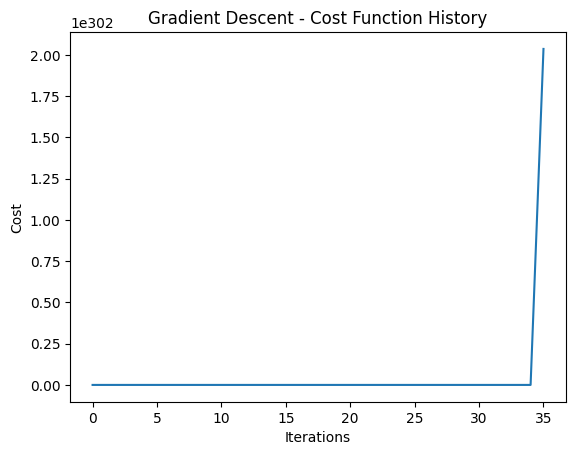

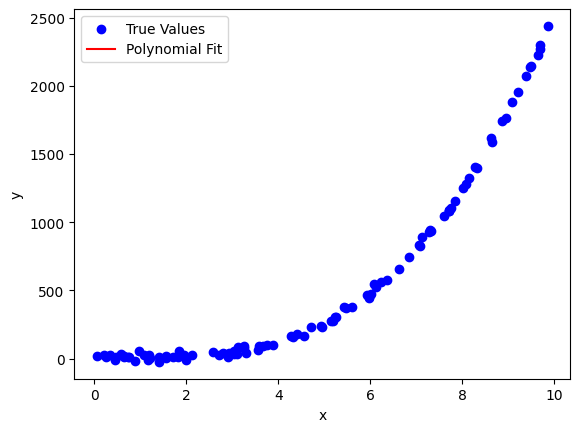

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Generate polynomial features (degree = 3)
def polynomial_features(x, degree):
    x_poly = x.copy()
    for i in range(2, degree + 1):
        x_poly = np.c_[x_poly, x**i]  # Add higher degree features
    return x_poly

# Cost function (Mean Squared Error)
def compute_cost(X, y, w, b):
    m = len(y)
    predictions = X.dot(w) + b
    cost = (1 / (2 * m)) * np.sum(np.square(predictions - y))
    return cost

# Gradient Descent
def gradient_descent(X, y, w, b, alpha, iterations):
    m = len(y)
    cost_history = []
    
    for i in range(iterations):
        # Compute predictions
        predictions = X.dot(w) + b
        
        # Calculate gradients
        dw = (1 / m) * X.T.dot(predictions - y)  # Derivative w.r.t w
        db = (1 / m) * np.sum(predictions - y)   # Derivative w.r.t b
        
        # Update parameters
        w -= alpha * dw
        b -= alpha * db
        
        # Compute cost
        cost_history.append(compute_cost(X, y, w, b))
    
    return w, b, cost_history

# Initialize variables
degree = 3
alpha = 0.1
iterations = 1000

# Generate sample data (for illustration purposes)
np.random.seed(42)
x = np.random.rand(100, 1) * 10  # Random values between 0 and 10
y = 3 * x**3 - 5 * x**2 + 2 * x + 7 + np.random.randn(100, 1) * 20  # Cubic relationship with noise

# Add bias term (column of ones) and generate polynomial features
X_poly = polynomial_features(x, degree)
X_poly = np.c_[np.ones((X_poly.shape[0], 1)), X_poly]  # Add bias column (for intercept)

# Initialize weights (w) and bias (b)
w_initial = np.zeros((X_poly.shape[1], 1))
b_initial = 0

# Run gradient descent
w_final, b_final, cost_history = gradient_descent(X_poly, y, w_initial, b_initial, alpha, iterations)

# Output results
print(f"Final weights: \n{w_final}")
print(f"Final bias: {b_final}")
print(f"Final cost: {cost_history[-1]}")

# Plot the cost function history
plt.plot(range(iterations), cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Gradient Descent - Cost Function History")
plt.show()

# Plot the predictions vs true values
y_pred = X_poly.dot(w_final) + b_final
plt.scatter(x, y, color='blue', label='True Values')
plt.plot(x, y_pred, color='red', label='Polynomial Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


Final weights: 
[[239.28878656]
 [138.14496858]
 [168.91696039]
 [184.09033567]
 [191.03824979]]
Final bias: 239.2887865608371
Final cost: 7101.205389091431


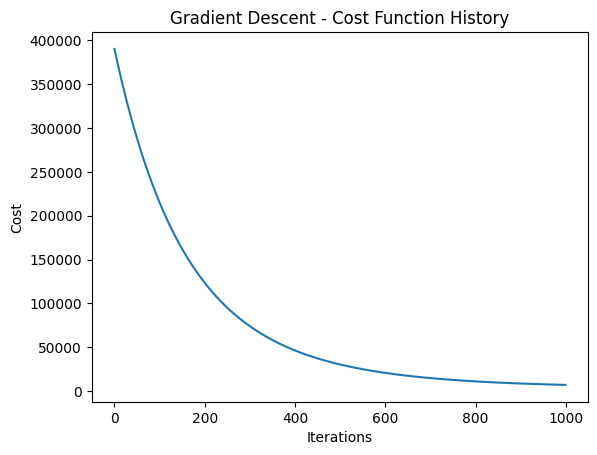

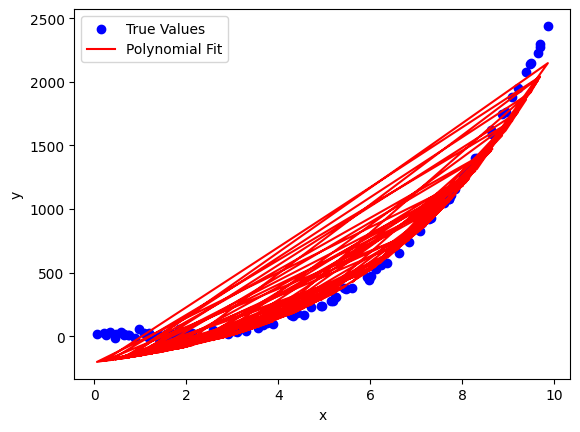

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Generate polynomial features (degree = 3)
def polynomial_features(x, degree):
    x_poly = x.copy()
    for i in range(2, degree + 1):
        x_poly = np.c_[x_poly, x**i]  # Add higher degree features
    return x_poly

# Cost function (Mean Squared Error)
def compute_cost(X, y, w, b):
    m = len(y)
    predictions = X.dot(w) + b
    cost = (1 / (2 * m)) * np.sum(np.square(predictions - y))
    return cost

# Gradient Descent
def gradient_descent(X, y, w, b, alpha, iterations):
    m = len(y)
    cost_history = []
    
    for i in range(iterations):
        # Compute predictions
        predictions = X.dot(w) + b
        
        # Calculate gradients
        dw = (1 / m) * X.T.dot(predictions - y)  # Derivative w.r.t w
        db = (1 / m) * np.sum(predictions - y)   # Derivative w.r.t b
        
        # Update parameters
        w -= alpha * dw
        b -= alpha * db
        
        # Compute cost
        cost_history.append(compute_cost(X, y, w, b))
    
    return w, b, cost_history

# Initialize variables
degree = 4
alpha = 0.001  # Reduced learning rate
iterations = 1000

# Generate sample data (for illustration purposes)
np.random.seed(42)
x = np.random.rand(100, 1) * 10  # Random values between 0 and 10
y = 3 * x**3 - 5 * x**2 + 2 * x + 7 + np.random.randn(100, 1) * 20  # Cubic relationship with noise

# Add bias term (column of ones) and generate polynomial features
X_poly = polynomial_features(x, degree)

# Scale features (Standardization)
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

# Add bias column (for intercept)
X_poly_scaled = np.c_[np.ones((X_poly_scaled.shape[0], 1)), X_poly_scaled]

# Initialize weights (w) and bias (b)
w_initial = np.zeros((X_poly_scaled.shape[1], 1))
b_initial = 0

# Run gradient descent
w_final, b_final, cost_history = gradient_descent(X_poly_scaled, y, w_initial, b_initial, alpha, iterations)

# Output results
print(f"Final weights: \n{w_final}")
print(f"Final bias: {b_final}")
print(f"Final cost: {cost_history[-1]}")

# Plot the cost function history
plt.plot(range(iterations), cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Gradient Descent - Cost Function History")
plt.show()

# Plot the predictions vs true values
y_pred = X_poly_scaled.dot(w_final) + b_final
plt.scatter(x, y, color='blue', label='True Values')
plt.plot(x, y_pred, color='red', label='Polynomial Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
